# Phase 2 Project 

## Overview

## Business Understanding 

In [ ]:
import pandas as pd
import resources as helpers    # Has data_exploration, data_preperation and data_visualization
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

## Data Understanding

**Columns:** <br>
id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront,  <br>
greenbelt, nuisance, view, condition, grade, heat_source, sewer_system, sqft_above, <br>
sqft_basement, sqft_garage, sqft_patio, yr_built, yr_renovated, address, lat, long  <br>

For this project, we will be looking at variables that would have a strong impact to price. Some features of a house won't be needed and will be removed from the dataset. From the initial look at the data; date, lat, long, address, and id shouldn't have any effect on price. There are quite a bit of independent variables to choose from so I will be limiting them to the ones with the highest positive correlation to price, our dependent variable for this project. 

**Used Columns and Correlation:** <br>
sqft_living: 0.6085, sqft_above: 0.5386, bathrooms: 0.4804, sqft_patio, 0.3134, bedrooms: 0.2892, <br>
sqft_garage: 0.2641, sqft_basement: 0.2450, floors: 0.1805, yr_built: 0.0960, sqft_lot: 0.0857 <br>

In [ ]:
df = pd.read_csv('dsc-phase-2-project-v2-5-main/data/kc_house_data.csv')
helpers.de.look_dataframe(df)
helpers.dp.correlation_with(df, 'price')

## Data Preperation

### Data Cleaning
**Actions needed:** <br>
1. Remove duplicates
2. Remove NaN and missing values

There are only 1 duplicate house that was in the dataset so I will be removing it. <br>
There were columns with missing values. Based on how many, I will decide to drop the row or column. 

In [ ]:
helpers.de.look_columns(df, ['heat_source', 'sewer_system'])
df_cleaned = helpers.dp.check_and_drop(df)
used_columns = ['sqft_living','sqft_above', 'bathrooms', 'sqft_patio', 'bedrooms'
                , 'sqft_garage', 'sqft_basement', 'floors','yr_built', 'sqft_lot']
#df_subset = df_cleaned[used_columns]

## Data Adjustments


In [ ]:
df_prepped = helpers.dp.outliers_remove(df_cleaned,'price')

## Data Analysis

## Single Variable Models

Every used variables will be modeled with price to see if there is a strong relationship present individually

        models[column] = (helpers.dp.create_model(df_prepped, column, 'price'))

    all_model, all_results = helpers.dp.create_model(df_prepped, used_columns, 'price')
print('R-Squared = {}'.format(all_results.rsquared))
print(all_results.summary())

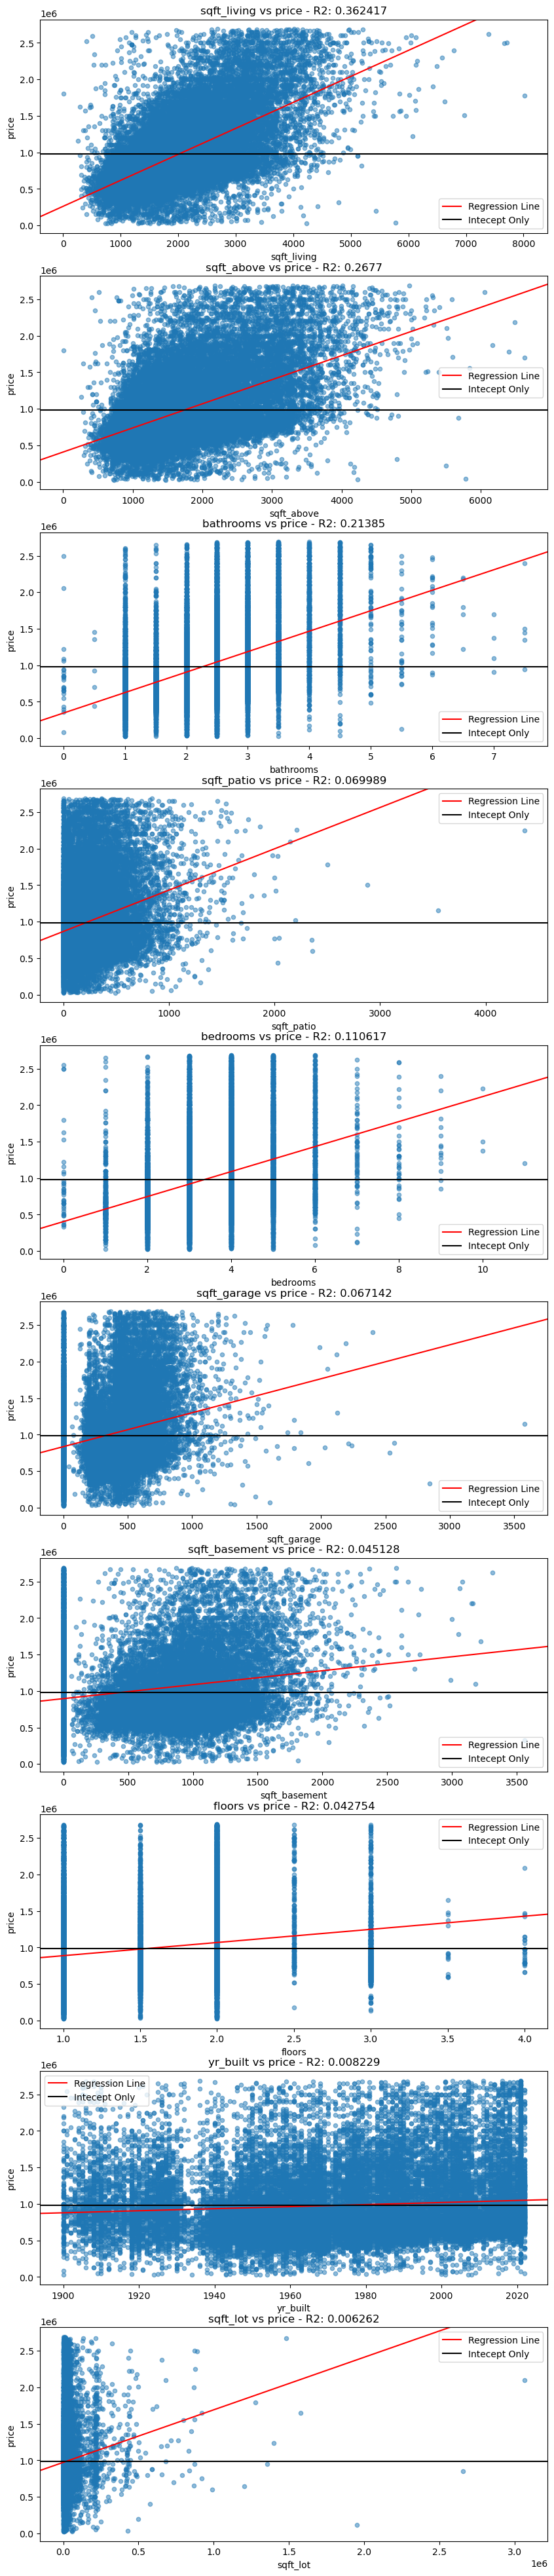

In [5]:
models = []
results = []
for column in used_columns:
    model, result = helpers.dp.create_model(df_prepped, column, 'price')
    models.append(model)
    results.append(result)

fig, ax = helpers.dv.plot_dataframe(df_prepped, used_columns, (10,50), regression= True, results= results);

In [6]:
all_model, all_results = helpers.dp.create_model(df_prepped, used_columns, 'price')
print('R-Squared = {}'.format(all_results.rsquared))
print(all_results.summary())

R-Squared = 0.39536275151795064
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     1889.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:01:04   Log-Likelihood:            -4.1263e+05
No. Observations:               28897   AIC:                         8.253e+05
Df Residuals:                   28886   BIC:                         8.254e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         

C:\Users\Tommy\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


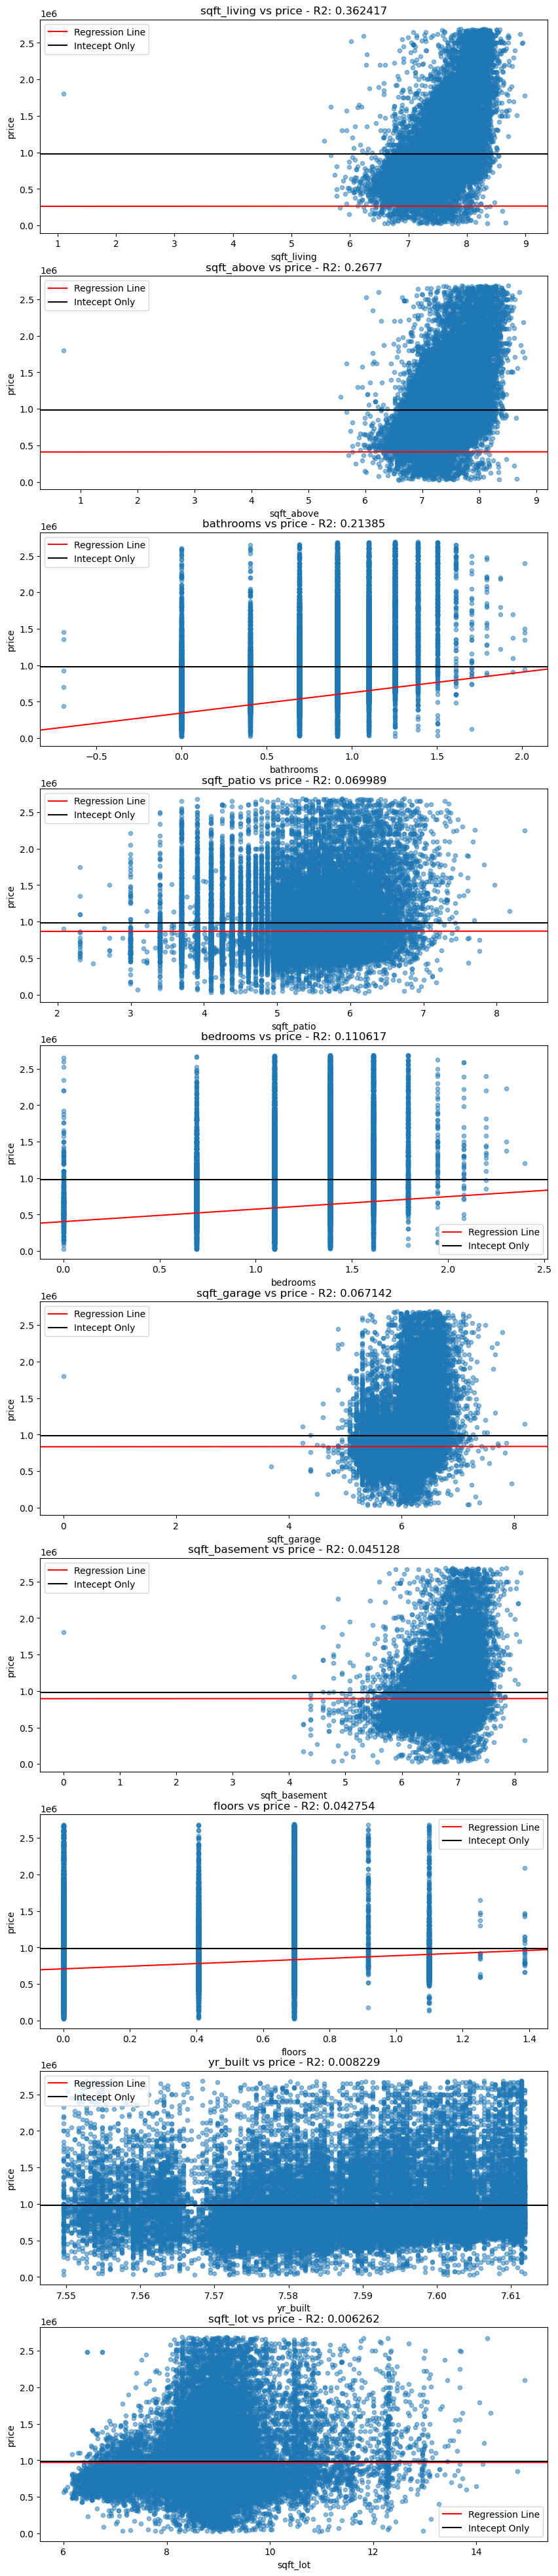

In [7]:
df_log = helpers.de.apply_log(df_prepped, used_columns)
fig, ax = helpers.dv.plot_dataframe(df_log, used_columns, (10,50), regression= True, results= results);

## Conclusion

## Next Steps

First initial look are data frame
The Data Frame columns that will be useful will be price for the dependent y value
Id is just to keep track the house but that is not needed to interpritation
Data should be useful but might give insight to curent economic status
Useful features of a house might be 
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront','nuisance','view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address']

## Data Preperations
**Remove and drop columns and rows with few missing values for the data frame** <br>
**Seperate dateframe in categories and numeric data types** 

In [8]:
prepared_df = helpers.dp.check_and_drop(df)    # Removed dups and missing values
useless_columns = ['id', 'date', 'lat', 'long', 'address']    #Not useful columns
prepared_df.drop(useless_columns, axis= 1, inplace = True)    #Drop useless columns
df_numeric, df_categories = helpers.dp.seperate_dataframe(df)    #Seperate the dataframe from categories and numeric
useful_columns = ['sqft_living','sqft_above','bathrooms','sqft_patio'
                  ,'bedrooms','sqft_garage','sqft_basement']    #Most correlations from these listed columns


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [9]:
model, results = helpers.dp.create_model(df, df_numeric.columns, 'price')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.554e+32
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:01:10   Log-Likelihood:             5.5514e+05
No. Observations:               30111   AIC:                        -1.110e+06
Df Residuals:                   30098   BIC:                        -1.110e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.879e-09   1.24e-09     -4.733

In [10]:
round(.00111,5)

0.00111